# Pandas Fundamentals Notebook


# 🐼 Pandas Fundamentals – With Visualizations and Advanced Operations

In this notebook, we'll explore the core features of Pandas using a sample employee dataset, along with visualizations using matplotlib and advanced operations like reshaping and 
rolling windows.


In [2]:
## 📥 1. Load and View the Data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah'],
    'Age': [25, 30, 35, 40, 22, 28, 33, 38],
    'Department': ['HR', 'IT', 'IT', 'Finance', 'HR', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 65000, 70000, 48000, 72000, 68000, 51000],
    'JoinDate': pd.to_datetime(['2020-01-15', '2019-03-10', '2018-07-23', '2017-06-01',
                                 '2021-09-12', '2016-11-30', '2015-04-20', '2022-01-05'])
}

df = pd.DataFrame(data)
df.head()

,Name,Age,Department,Salary,JoinDate
0,Alice,25,HR,50000,2020-01-15
1,Bob,30,IT,60000,2019-03-10
2,Charlie,35,IT,65000,2018-07-23
3,David,40,Finance,70000,2017-06-01
4,Eva,22,HR,48000,2021-09-12


In [3]:
## 🧾 2. Summary and Info


df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Age         8 non-null      int64         
 2   Department  8 non-null      object        
 3   Salary      8 non-null      int64         
 4   JoinDate    8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 452.0+ bytes


,Age,Salary,JoinDate
count,8.000000,8.000000,8
mean,31.375000,60500.000000,2018-11-21 15:00:00
min,22.000000,48000.000000,2015-04-20 00:00:00
25%,27.250000,50750.000000,2017-04-16 06:00:00
50%,31.500000,62500.000000,2018-11-15 00:00:00
75%,35.750000,68500.000000,2020-06-14 12:00:00
max,40.000000,72000.000000,2022-01-05 00:00:00
std,6.277795,9680.613912,NaN


In [15]:
## 🔎 3. Filtering, Sorting, and Selection

df[df['Age'] > 30]

,Name,Age,Department,Salary,JoinDate,Seniority
2,Charlie,35,IT,65000.0,2018-07-23,Senior
3,David,40,Finance,70000.0,2017-06-01,Senior
6,Grace,33,IT,68000.0,2015-04-20,Senior
7,Hannah,38,HR,51000.0,2022-01-05,Senior


In [16]:
df.sort_values(by='Salary', ascending=False)
df[['Name', 'Age','Salary']]

,Name,Age,Salary
0,Alice,25,50000.000000
1,Bob,30,60571.428571
2,Charlie,35,65000.000000
3,David,40,70000.000000
4,Eva,22,48000.000000
5,Frank,28,72000.000000
6,Grace,33,68000.000000
7,Hannah,38,51000.000000


<Axes: xlabel='Age', ylabel='Count'>

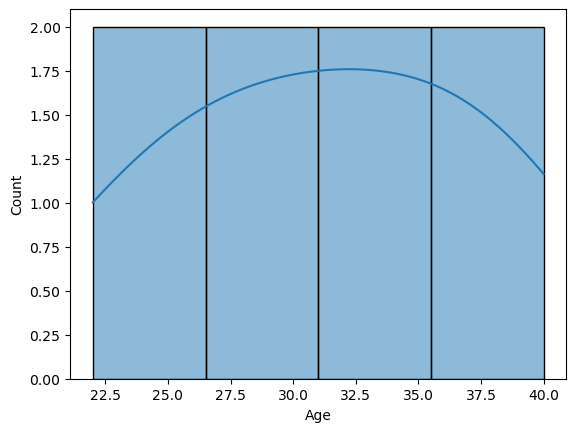

In [7]:
## 📊 4. Visualization with Matplotlib/Seaborn

### Distribution of Age

sns.histplot(df['Age'], kde=True)

In [8]:
## 📈 5. Grouping and Aggregation

df.groupby('Department')['Salary'].mean()

Department
Finance    71000.000000
HR         49666.666667
IT         64333.333333
Name: Salary, dtype: float64

In [9]:
## 🛠️ 6. Creating New Columns

df['Seniority'] = df['Age'].apply(lambda x: 'Junior' if x < 30 else 'Senior')


In [10]:
df

,Name,Age,Department,Salary,JoinDate,Seniority
0,Alice,25,HR,50000,2020-01-15,Junior
1,Bob,30,IT,60000,2019-03-10,Senior
2,Charlie,35,IT,65000,2018-07-23,Senior
3,David,40,Finance,70000,2017-06-01,Senior
4,Eva,22,HR,48000,2021-09-12,Junior
5,Frank,28,Finance,72000,2016-11-30,Junior
6,Grace,33,IT,68000,2015-04-20,Senior
7,Hannah,38,HR,51000,2022-01-05,Senior


In [11]:
## 🧹 7. Missing Data Handling

df.loc[1, 'Salary'] = None

In [12]:
df

,Name,Age,Department,Salary,JoinDate,Seniority
0,Alice,25,HR,50000.0,2020-01-15,Junior
1,Bob,30,IT,NaN,2019-03-10,Senior
2,Charlie,35,IT,65000.0,2018-07-23,Senior
3,David,40,Finance,70000.0,2017-06-01,Senior
4,Eva,22,HR,48000.0,2021-09-12,Junior
5,Frank,28,Finance,72000.0,2016-11-30,Junior
6,Grace,33,IT,68000.0,2015-04-20,Senior
7,Hannah,38,HR,51000.0,2022-01-05,Senior


In [13]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

/var/folders/4c/psgh28ws1qs5hy72_rfvyzq00000gn/T/ipykernel_66447/2644856927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(), inplace=True)


In [14]:
df

,Name,Age,Department,Salary,JoinDate,Seniority
0,Alice,25,HR,50000.000000,2020-01-15,Junior
1,Bob,30,IT,60571.428571,2019-03-10,Senior
2,Charlie,35,IT,65000.000000,2018-07-23,Senior
3,David,40,Finance,70000.000000,2017-06-01,Senior
4,Eva,22,HR,48000.000000,2021-09-12,Junior
5,Frank,28,Finance,72000.000000,2016-11-30,Junior
6,Grace,33,IT,68000.000000,2015-04-20,Senior
7,Hannah,38,HR,51000.000000,2022-01-05,Senior
